In [1]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [8]:
consumer_key = 'u45ngwHcJhgtCybpctPgO0xMG'
consumer_secret = 'RxvvQWvmqLDZs1JLgReM7vD4rq2727MZVLiLlfHr3C9Wsmzw0U'
access_token = '879390376691453952-LMqqRPysWOrmyE9q3wDKYHrRftMjIFY'
access_secret = 'veZ0v6gJWLHPjtRPSiI3uNzUwKGzJXqPUgEb7Mi3Tn9Qq'

In [9]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [10]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())
# Create a custom search term and define the number of tweets
search_term = "#spacex -filter:retweets"

tweets = tw.Cursor(api.search, q=search_term, lang="en", since='2019-07-24', until='2019-07-25').items(500)

# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

In [11]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]

TextBlob("trees and Nativeforests are immensely valuable SaveOurNativeForests ecocide is a crime against humanity")

TextBlob("trees and Nativeforests are immensely valuable SaveOurNativeForests ecocide is a crime against humanity")

In [12]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]
[0.0,
 'trees and Nativeforests are immensely valuable SaveOurNativeForests ecocide is a crime against humanity']

[0.0,
 'trees and Nativeforests are immensely valuable SaveOurNativeForests ecocide is a crime against humanity']

In [13]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()

,polarity,tweet
0,-0.250,Alien 1 Hey I went out for a spin today and fo...
1,0.600,Aw a kind gentleman wearing a SpaceX tshirt to...
2,-0.125,SpaceX scrubs launch attempt from Cape Canaver...
3,0.125,SpaceX s Starhopper eventually to be destined ...
4,0.500,elonmusk Starship SpaceX On my way to SpaceX B...


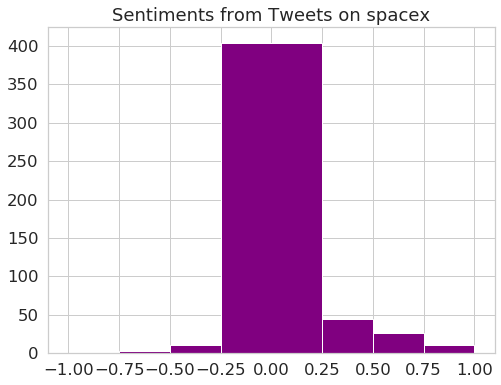

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on spacex")
plt.show()

In [15]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [16]:
import tweepy
api = tweepy.API(auth)
for tweet in tweepy.Cursor(api.search,
                           q="spacex",
                           since="2019-07-24",
                           until="2019-07-25",
                           lang="en").items(50):
    print (tweet.created_at, tweet.text)

2019-07-24 23:59:41 RT @NASA: Today’s launch of @SpaceX’s #Dragon spacecraft was scrubbed due to unfavorable weather conditions. The launch is now targeted for…
2019-07-24 23:59:41 RT @BocaChicaGal: Venting stopped a bit ago and it's really quiet. SpaceX workers are pulling up to watch StarHopper hop. ❤StarHopper ❤
2019-07-24 23:59:30 RT @DJSonik6: @NASAKennedy @SpaceX @Space_Station Super Mega Dope Awesome 👏🥰😍 SO PROUD 🥰 of you @elonmusk 🚀🛰🥇🌎
2019-07-24 23:59:26 @NASAKennedy @SpaceX @Space_Station Super Mega Dope Awesome 👏🥰😍 SO PROUD 🥰 of you @elonmusk 🚀🛰🥇🌎
2019-07-24 23:59:10 Watch SpaceX's StarHopper hop 20 meters untethered! https://t.co/DgCECh5XPK via @YouTube
2019-07-24 23:59:08 RT @BocaChicaGal: Venting stopped a bit ago and it's really quiet. SpaceX workers are pulling up to watch StarHopper hop. ❤StarHopper ❤
2019-07-24 23:59:05 @RenataKonkoly @Desperation2 @marialauraadr @elonmusk @NASAKennedy @SpaceX @Space_Station Ha ha, ok 👌 good night 💤😴
2019-07-24 23:59:04 RT @CNNBusines

In [17]:
import tweepy as tw
search_term = "#spacex -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2019-07-24', until='2019-07-25').items(250)

# Remove URLs and create textblob object for each tweet
all_tweets_no_urls = [TextBlob(remove_url(tweet.text)) for tweet in tweets]

all_tweets_no_urls[:20]

[TextBlob("Alien 1 Hey I went out for a spin today and found slime and a soccer ballAlien 2 Let me guessfrom earth rig"),
 TextBlob("Aw a kind gentleman wearing a SpaceX tshirt told me I wasnt allowed through BocaChica road before even driving"),
 TextBlob("SpaceX scrubs launch attempt from Cape Canaveral due to weather SpaceX Falcon9 via"),
 TextBlob("SpaceX s Starhopper eventually to be destined for Mars is having its historic first test launch today Livestre"),
 TextBlob("elonmusk Starship SpaceX On my way to SpaceX Boca Chica Lets see if Im able to see Starship Hop from a dist"),
 TextBlob("So good to see austinbarnard45 BocaChicaGal and the rest of the community coming together to create the coverage"),
 TextBlob("So the Dragon Spacecraft will be launched to the ISS today New scientific experiment will be conducted on the ISS"),
 TextBlob("How to watch star hopper on 3 screens D starhopper spacex"),
 TextBlob("Almost a go It was a NO Either way it was great to take a chance with r

In [18]:
# Calculate polarity of tweets
wild_sent_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in all_tweets_no_urls]

# Create dataframe containing polarity values and tweet text
wild_sent_df = pd.DataFrame(wild_sent_values, columns=["polarity", "tweet"])
wild_sent_df = wild_sent_df[wild_sent_df.polarity != 0]

wild_sent_df.head()

,polarity,tweet
0,-0.250,Alien 1 Hey I went out for a spin today and fo...
1,0.600,Aw a kind gentleman wearing a SpaceX tshirt to...
2,-0.125,SpaceX scrubs launch attempt from Cape Canaver...
3,0.125,SpaceX s Starhopper eventually to be destined ...
4,0.500,elonmusk Starship SpaceX On my way to SpaceX B...


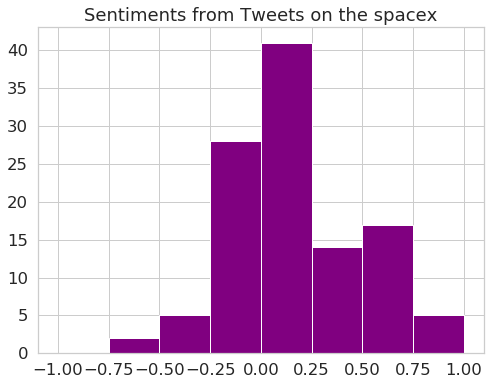

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))

wild_sent_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
        ax=ax, color="purple")

plt.title("Sentiments from Tweets on the spacex")
plt.show()